# BERT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
file_path = "dataset_raw.csv"
data = pd.read_csv(file_path)

In [ ]:
X = data['text']
y = data['category']
print(X.shape)
print(y.shape)

(20000,)
(20000,)


In [ ]:
unique_values, counts = np.unique(y, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print("Value Counts:")
for value, count in value_counts.items():
    print(f"{value}: {count}")

Value Counts:
0: 5797
1: 6761
2: 1641
3: 2709
4: 2373
5: 719


In [ ]:
#!pip install datasets

In [ ]:
#!pip install torch

In [ ]:
import torch
from datasets import load_dataset
from transformers import pipeline
import pandas as pd
import plotly.express as px

In [ ]:
device = torch.device("cuda")

## BERT Use-case Demo

In [ ]:
# BERT - uncased emotion
# A find-tuned bert-based classifier
# https://huggingface.co/bhadresh-savani/bert-base-uncased-emotion

classifier = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
print(prediction)

[[{'label': 'sadness', 'score': 0.0005138230626471341}, {'label': 'joy', 'score': 0.9972521662712097}, {'label': 'love', 'score': 0.0007443324429914355}, {'label': 'anger', 'score': 0.0007404921343550086}, {'label': 'fear', 'score': 0.00032938565709628165}, {'label': 'surprise', 'score': 0.00041974865598604083}]]


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
prediction

[[{'label': 'sadness', 'score': 0.0005138230626471341},
  {'label': 'joy', 'score': 0.9972521662712097},
  {'label': 'love', 'score': 0.0007443324429914355},
  {'label': 'anger', 'score': 0.0007404921343550086},
  {'label': 'fear', 'score': 0.00032938565709628165},
  {'label': 'surprise', 'score': 0.00041974865598604083}]]

In [ ]:
# run the model to test our dataset
# note, use the exactly same way to split the dataset!!!!!!

In [ ]:
## Train-test split

## Train-Test Split

In [ ]:
X = data['text']
y = data['category']

In [ ]:
# Splitting the data and renaming variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print('Data shape: ', X.shape)

# Displaying the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

Data shape:  (20000,)
X_train shape: (12000,)
X_val shape: (4000,)
X_test shape: (4000,)
y_train shape: (12000,)
y_val shape: (4000,)
y_test shape: (4000,)


In [ ]:
y

0        0
1        0
2        3
3        2
4        3
        ..
19995    3
19996    3
19997    1
19998    1
19999    4
Name: category, Length: 20000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


# Function to calculate performance metrics
def evaluate_performance(X):
    predicted_labels = []

    # Iterate through the dataset to make predictions for each text
    for text in X:
        prediction = classifier(text)
        predicted_label = max(prediction[0], key=lambda x: x['score'])['label']
        predicted_labels.append(predicted_label)

    return predicted_labels

# # Evaluate performance on train set
# train_pred = evaluate_performance(X_train)

# # Evaluate performance on validation set
# val_pred = evaluate_performance(X_val)

# Evaluate performance on test set
test_pred = evaluate_performance(X_test)

In [ ]:
# Define a mapping dictionary
emotion_mapping = {
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5
}

# Convert predicted labels to numbers
predicted_labels_numeric = [emotion_mapping[label] for label in test_pred]

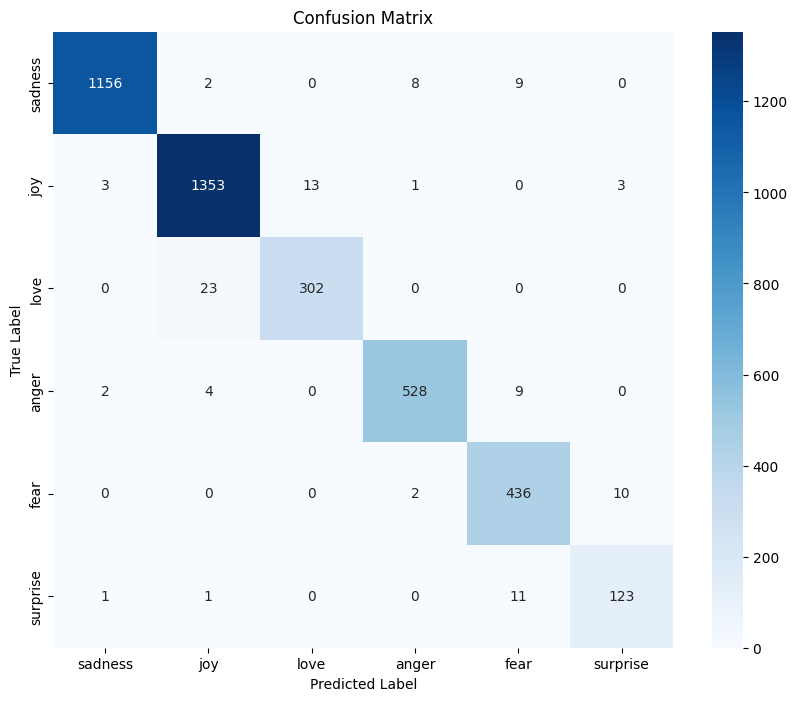

Classification Report:
              precision    recall  f1-score   support

     sadness       0.99      0.98      0.99      1175
         joy       0.98      0.99      0.98      1373
        love       0.96      0.93      0.94       325
       anger       0.98      0.97      0.98       543
        fear       0.94      0.97      0.96       448
    surprise       0.90      0.90      0.90       136

    accuracy                           0.97      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_numeric)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_mapping.keys(), yticklabels=emotion_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
cls_report = classification_report(y_test, predicted_labels_numeric, target_names=emotion_mapping.keys())

# Print classification report
print("Classification Report:")
print(cls_report)

# Calculate and print other performance metrics
# You can calculate additional metrics such as precision, recall, etc.
